
# Project: Showing for their appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset describes over 100k medical appointments from Brazil and it is focused on the question of whether or not patients show up for their appointment. According to the data, 30% of the patients do not show up for their appointment. The objective of this analysis is to find out what factors or attributes may lead to this issue.


### Data Dictionary
* `PatientId`:  Identification of a patient.
* `AppointmentID`: Identification of each appointment.
* `Gender`: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
* `AppointmentDay`: The day of the actual appointment, when they have to visit the doctor.
* `ScheduledDay`: The day someone called or registered the appointment, this is before appointment of course.
* `Age`: How old is the patient.
* `Neighbourhood`: Where the appointment takes place.
* `Scholarship`: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
* `Hipertension`: True or False
* `Diabetes`: True or False
* `Alcoholism`: True or False
* `Handcap`: True or False
* `SMS_received`: 1 or more messages sent to the patient.
* `No-show`: True or False.

### Main question addressed

What factors influence more in the decision of the patient to show up or not? Is there any way of predicting if the appointment will be canceled?

##### Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Extracting description and information of the data

In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


`Observations`
We notice that Age has a value of -1 and Handcap has a maximum of 4. We need to investigate further. 

In [6]:
# Checking the unique values for Handcap

df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

##### Information of the dataset (no-null and data type columns)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


`Observations`
So far, null values have not been spotted and data types look concise with the description of the attributes

##### Checking for duplicated

In [8]:
print("Duplicated Values")
print(f"PatientId: {df.PatientId.duplicated().sum()}")
print(f"AppointmentId: {df.AppointmentID.duplicated().sum()}")

Duplicated Values
PatientId: 48228
AppointmentId: 0


`Observation:`
Some patients have more than one appointment

In [39]:
len(set(df.PatientId))

62299

In [33]:
len(df.PatientId.value_counts())

62299

In [46]:
print(f"There are {df.shape[0] - len(df.PatientId.value_counts())} patients that have scheduled more than one appointments. Meaning, the {round((df.shape[0]-len(df.PatientId.value_counts()))/df.shape[0]*100,2)}% of all the patients")

There are 48228 patients that have scheduled more than one appointments. Meaning, the 43.63% of all the patients


#### Summary of Analysis

**1.** There are 110527 rows, with no duplicated appointment ID value, meaning there are 110527 appointments.

**2.** From those appointments, 48228 are customers with more than one appointments, which is more than 40% of all the patients.

**3.** The average age is 37, with a maximum of 115 and minimum of -1, which is an error.

**4.** There are value of 2,3 and 4 for Handicaps. After researching in the discussion section on Kaggle about this value, there is not clear conclusion whether it is an error or this value represents the number of handicaps the client has. [https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699]. So, because the clients with more than 1 handicap are not that many compared to the length of the dataset. I will proceed to remove it.

**5.** AppointmentDay has a time of 00.00.00 for all the rows, so we can not take the factor hours-min-second into account for scheduled appointments in the same day.

**6.** There is a bit of confusion in the meaning of the variables of AppointmentDay and ScheduleDay [https://www.kaggle.com/joniarroba/noshowappointments/discussion/39322]. For the sake of this analysis, as stated in the variables dictionary, I will set AppointmentDay as the date the appointment was first set, and Schedule Day as the day the client supposedly had the consult. I took this decision based on the factor that AppointmentDay seems to be automatically recorded (through a software or website at the time the user set his/her appointment), whether ScheduleDay seems to be human recorded, or set by human.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

#### Renaming columns
I will set columns to lowercase for easier work with it.

In [9]:
df.columns = map(str.lower, df.columns)

df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


#### Checking for weird values
* I will remove the Age value(s) of -1 and the handcap values over 1 at the end of this section because I don't mess with the index order, which I will need later on.


`Checkin how many values of Age = -1 there are`

In [175]:
np.sum(df.age == -1)

1

`Checking how many values of handcap over 1 there are`

In [176]:
np.sum(df.handcap > 1)

199

#### Changing date format and type for scheduledday and appointmentday

As observed before appointmentday columns hour:minute:second time is 0 for all the values. So, to keep both date columns consistent, we will set them to the same format and will modify their type

In [70]:
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [10]:
df.appointmentday = df.appointmentday.apply(lambda x:x[:10])
df.scheduledday = df.scheduledday.apply(lambda x:x[:10])
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.appointmentday = pd.to_datetime(df.appointmentday)
df.scheduledday = pd.to_datetime(df.scheduledday)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110527 non-null  float64       
 1   appointmentid   110527 non-null  int64         
 2   gender          110527 non-null  object        
 3   scheduledday    110527 non-null  datetime64[ns]
 4   appointmentday  110527 non-null  datetime64[ns]
 5   age             110527 non-null  int64         
 6   neighbourhood   110527 non-null  object        
 7   scholarship     110527 non-null  int64         
 8   hipertension    110527 non-null  int64         
 9   diabetes        110527 non-null  int64         
 10  alcoholism      110527 non-null  int64         
 11  handcap         110527 non-null  int64         
 12  sms_received    110527 non-null  int64         
 13  no-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

#### Summary of our date columns

In [12]:
print("Looking at the min and max values of appointment day we can see our data contains: ")
print(f"First date of appointments: {min(df.appointmentday)}")
print(f"Last date of appointments: {max(df.appointmentday)}")
print(f"Total of {(max(df.appointmentday)-min(df.appointmentday))}")

Looking at the min and max values of appointment day we can see our data contains: 
First date of appointments: 2016-04-29 00:00:00
Last date of appointments: 2016-06-08 00:00:00
Total of 40 days 00:00:00


In [13]:
print("Looking at the min and max values of schedule days we can see our data contains: ")
print(f"First date for scheduled appointments: {min(df.scheduledday)}")
print(f"Last date for scheduled appointments: {max(df.scheduledday)}")
print(f"Total of {(max(df.scheduledday)-min(df.scheduledday))}")

Looking at the min and max values of schedule days we can see our data contains: 
First date for scheduled appointments: 2015-11-10 00:00:00
Last date for scheduled appointments: 2016-06-08 00:00:00
Total of 211 days 00:00:00


#### Adding columns for better exploration of the data

In this part I will add columns for the weekday of the appointment, the waiting time and number of appointments.

`weekday`: Week day of the appointment.

`waiting_time`: This column will reflect the days difference between the Appointment day and the schedule day.

`number_of_appointments`: This column will reflect the number of appointment this user has in this time period.

In [182]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

##### Adding waiting_time column

In [14]:
df["waiting_time"] =df["appointmentday"] - df["scheduledday"] 
df.waiting_time = df.waiting_time.astype(str)
df.waiting_time = df.waiting_time.apply(lambda x: x.split(" ")[0])

df.tail()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,waiting_time
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41
110526,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [15]:
df.waiting_time = df.waiting_time.astype(int)
df["waiting_time"].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

In [185]:
df.waiting_time[df.waiting_time<0].value_counts()

-1    4
-6    1
Name: waiting_time, dtype: int64

`Observations:` I noticed 5 negative values for waiting time columns, meaning that there are some errors in the data that shows appointment days after. I will proceed to remove these rows.

* Note: The removal is done at the end of the cleaning process so I dont mess the index order, which I will need later in this process

##### Adding weekday of the appointment date

In [16]:
df['day_of_week'] = df['appointmentday'].dt.day_name()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,waiting_time,day_of_week
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


##### Adding number of appointments per patientID

First, I create a dictionary that will map the patientId column to save how many times a patientid repeats. This is done by adding +1 to the corresponding patientid. At the same another dictionary will save the index of the DataFrame with the number of the appointments per patientId.

This is done this way, so this column reflects how many appointments the client had made previously when he makes a new one, and add it to the record. 

In [17]:
app_per_customer = dict()
number_of_appointment = dict()
for i in range(len(df.patientid)):
    if df.patientid[i] in app_per_customer.keys():
        app_per_customer[df.patientid[i]] += 1
        
    else:
        app_per_customer[df.patientid[i]] = 1
        
    number_of_appointment[i] = app_per_customer[df.patientid[i]]
    

In [18]:
apps_per_customer = pd.DataFrame.from_dict(number_of_appointment, orient='index', columns=["number_of_appointments"])
apps_per_customer.head()

,number_of_appointments
0,1
1,1
2,1
3,1
4,1


In [19]:
df_2 = pd.concat([df, apps_per_customer], axis = 1,ignore_index=False)
df_2.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,waiting_time,day_of_week,number_of_appointments
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,1
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,1


#### Dropping columns and rows with non-necessary values

##### Removing weird values of age and handcap

In [20]:
df_2 = df_2.query('age >= 0')
df_2 = df_2.query('handcap <= 1')
df_2.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,waiting_time,number_of_appointments
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,10.186971,2.271031
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,15.257836,3.916567
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,1.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,2.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,88.000000


In [21]:
df_2.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show',
       'waiting_time', 'day_of_week', 'number_of_appointments'],
      dtype='object')

##### Droping scheduled day and appointment day and appoitnment id columns as I will be using the new created column

In [45]:
df_3 = df_2.drop(['appointmentid', 'scheduledday', 'appointmentday'], axis=1)
df_3.head()

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,waiting_time,day_of_week,number_of_appointments
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,1
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,1
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,1
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,1
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,1


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Relationship of factors such as scholarship, hipertension, diabetes, alcoholism, handcap and sms received in the show up of a patient

* Note: I will create a copy of the dataframe with not duplicated patient id so this analysis is not biased. Because hipertension values, for example, can increase because they belong to the same person

##### Dividing the dataframe in the appointments that show and did not show

In [23]:
no_show_df = df_3[df_3["no-show"] == 'Yes']
show_df = df_3[df_3["no-show"] == 'No']



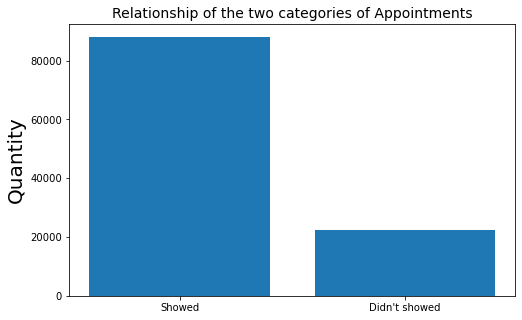

In [24]:
label = ["Showed", "Didn't showed"]
fig, ax = plt.subplots( figsize=(8,5))
height = len(show_df), len(no_show_df)
ax.bar(x=label, height=height)
ax.set_title("Relationship of the two categories of Appointments", fontsize=14)
ax.set_ylabel("Quantity", fontsize=20);

##### Relationship of people with scholarship and their decision of whether showing up or not
* Note. Because there are patients repeated over the frame. We will first group by patientId

* Note. I will use a dataframe with no duplicated clients

In [25]:
# Creating a dataframe with no duplicated clients. 
no_duplicates_df = df_3.drop_duplicates(subset='patientid', keep='first')

In [26]:
no_duplicates_df.tail()

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,waiting_time,day_of_week,number_of_appointments
110512,9.876246e+13,F,41,MARIA ORTIZ,0,0,0,0,0,0,No,0,Wednesday,1
110513,8.674778e+13,M,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,No,0,Wednesday,1
110518,7.263315e+13,F,50,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday,1
110520,9.969977e+14,F,42,MARIA ORTIZ,0,0,0,0,0,1,No,35,Tuesday,1
110524,1.557663e+13,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday,1


In [27]:
scholarship_df_sum = pd.DataFrame(no_duplicates_df.groupby('no-show').sum()['scholarship'])
scholarship_df_mean = pd.DataFrame(no_duplicates_df.groupby('no-show').mean()['scholarship'])

         scholarship
no-show             
No              4470
Yes             1306


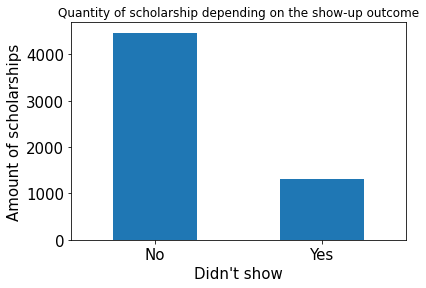

In [28]:
print(scholarship_df_sum)
scholarship_df_sum.plot(kind='bar', rot=0, fontsize=15, legend = False)
plt.title("Quantity of scholarship depending on the show-up outcome")
plt.xlabel("Didn't show", fontsize=15)
plt.ylabel("Amount of scholarships", fontsize=15);

         scholarship
no-show             
No          0.089366
Yes         0.107304


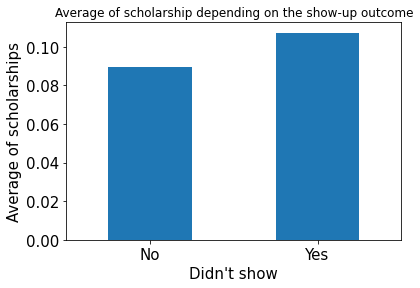

In [310]:
print(scholarship_df_mean)
scholarship_df_mean.plot(kind='bar', rot=0, fontsize=15, legend = False)
plt.title("Average of scholarship depending on the show-up outcome")
plt.xlabel("Didn't show", fontsize=15)
plt.ylabel("Average of scholarships", fontsize=15);

`Observations`:
10.7% of the clients that didn't show up had a scholarship compared to the 8.9% of the ones that showed up. A small relationship exist but it is too small

##### Creating a function to simplify the process for the other variables

In [343]:
def plot_factors(var):

    var_df_mean = pd.DataFrame(no_duplicates_df.groupby('no-show').mean()[var])
    print(var_df_mean)
    var_df_mean.plot(kind='bar', rot=0, fontsize=15, legend = False)
    plt.title(f"Average of {var} depending on the show-up outcome")
    plt.xlabel("Didn't show", fontsize=15)
    plt.ylabel(f"Average of {var}", fontsize=15)


##### Hipertension vs no-show

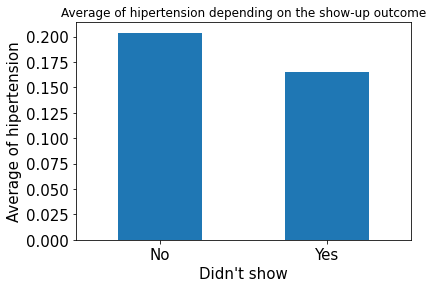

In [345]:
plot_factors('hipertension')

##### Diabetes vs no-show

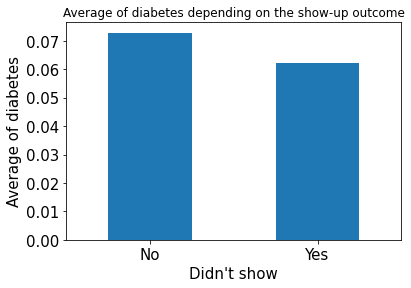

In [346]:
plot_factors('diabetes')

##### Alcoholism vs no-show

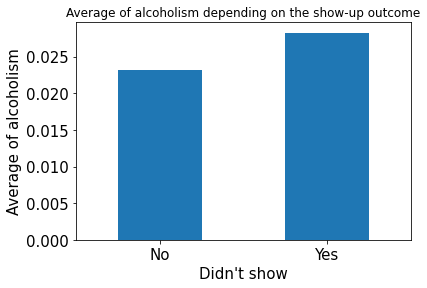

In [347]:
plot_factors('alcoholism')

##### Handcap vs no-show

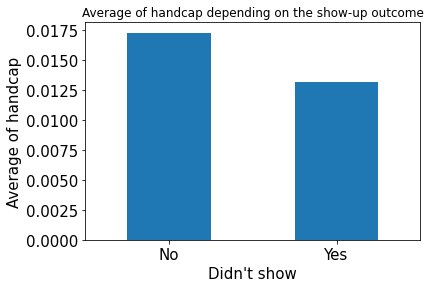

In [350]:
plot_factors('handcap')

##### SMS received vs no-show

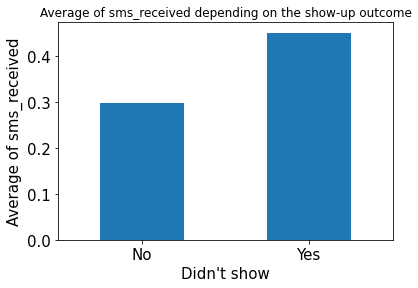

In [351]:
plot_factors('sms_received')

## Observations from the 1st question:

#### Showing up      

* Around 30% received a sms  
* Over 1.6% were handicapped                              
* Less than 2.5% had alcoholism issues                    
* Over 7% had diabetes                                    
* Almost 20% were hipertense                              
* Below 10% had scholarship                               

#### No showing up
* More than 40% received sms
* Around 1.3% were handicapped
* Over 2.5% had alcoholism issues
* Around 6% had diabetes
* Less tahn 17.5% were hipertense
* Over 10 percent had scholarship

### Research Question 2: Does the week day influences in the decision of the client for not showing up?

##### Checking how many appointments we have per weekday 

In [46]:
df_3.head()

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,waiting_time,day_of_week,number_of_appointments
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,1
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,1
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,1
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,1
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,1


In [55]:
weekday_df = df_3.groupby(['day_of_week', 'no-show']).count()['patientid']
# weekday_df = weekday_df.reset_index()
weekday_df.index

MultiIndex([(   'Friday',  'No'),
            (   'Friday', 'Yes'),
            (   'Monday',  'No'),
            (   'Monday', 'Yes'),
            ( 'Saturday',  'No'),
            ( 'Saturday', 'Yes'),
            ( 'Thursday',  'No'),
            ( 'Thursday', 'Yes'),
            (  'Tuesday',  'No'),
            (  'Tuesday', 'Yes'),
            ('Wednesday',  'No'),
            ('Wednesday', 'Yes')],
           names=['day_of_week', 'no-show'])

In [57]:
new_index = [(   'Monday',  'No'),
            (   'Monday', 'Yes'),
            (  'Tuesday',  'No'),
            (  'Tuesday', 'Yes'),
            ('Wednesday',  'No'),
            ('Wednesday', 'Yes'),
            ( 'Thursday',  'No'),
            ( 'Thursday', 'Yes'),           
            (   'Friday',  'No'),
            (   'Friday', 'Yes'),
            ( 'Saturday',  'No'),
            ( 'Saturday', 'Yes')]

weekday_df = weekday_df.reindex(new_index)
weekday_df = weekday_df.reset_index()
weekday_df

,day_of_week,no-show,patientid
0,Monday,No,17997
1,Monday,Yes,4681
2,Tuesday,No,20448
3,Tuesday,Yes,5136
4,Wednesday,No,20740
5,Wednesday,Yes,5084
6,Thursday,No,13882
7,Thursday,Yes,3335
8,Friday,No,14952
9,Friday,Yes,4033


##### Calculating the relative value

In [65]:
# Creating a new column
total_per_day = weekday_df.groupby('day_of_week').sum()['patientid']
percent = dict()
for i in range(len(weekday_df.day_of_week)):
    percent[i] = round((weekday_df['patientid'][i]/total_per_day[weekday_df['day_of_week'][i]])*100,2)
    
percent

{0: 79.36,
 1: 20.64,
 2: 79.92,
 3: 20.08,
 4: 80.31,
 5: 19.69,
 6: 80.63,
 7: 19.37,
 8: 78.76,
 9: 21.24,
 10: 76.92,
 11: 23.08}

##### Concatenating the new column 'percent'

In [71]:
percent_df = pd.DataFrame.from_dict(percent, orient='index', columns=['percent'])
weekday_df = pd.concat([weekday_df, percent_df], axis=1)
weekday_df

,day_of_week,no-show,patientid,percent
0,Monday,No,17997,79.36
1,Monday,Yes,4681,20.64
2,Tuesday,No,20448,79.92
3,Tuesday,Yes,5136,20.08
4,Wednesday,No,20740,80.31
5,Wednesday,Yes,5084,19.69
6,Thursday,No,13882,80.63
7,Thursday,Yes,3335,19.37
8,Friday,No,14952,78.76
9,Friday,Yes,4033,21.24


##### Plotting the relative frequency of the show up per weekday

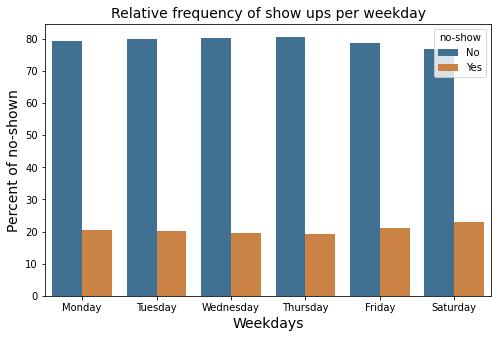

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='percent', hue='no-show', data=weekday_df, saturation=0.55)
plt.title("Relative frequency of show ups per weekday", fontsize=14)
plt.xlabel("Weekdays", fontsize=14)
plt.ylabel("Percent of no-shown", fontsize=14);

`Observations:`
Almost not relationship is noticed by day. All the weekdays behave similar in their relationship in no-shown and shown appointments.

### Research Question 3: Does awaiting time influence in the cancelation of an appointment?

##### First, I am going to look what is the average of the waiting time


In [78]:
round(df_3.waiting_time.mean())

10

##### Second, I am going to divide the data and grouped by the appointment with waiting time of less and more of the average

In [96]:
over_waiting_time_df = df_3.query('waiting_time > 10')
less_waiting_time_df = df_3.query('waiting_time <= 10')

In [116]:
over_time_df = pd.DataFrame(over_waiting_time_df.groupby('no-show').count()['patientid'])
over_time_df.rename(columns = {'patientid':'over_waiting_time'}, inplace=True) 
total = over_time_df.over_waiting_time.sum()
over_time_df,total


(         over_waiting_time
 no-show                   
 No                   23213
 Yes                  11180,
 34393)

In [117]:
# Relative frequency
over_time_df.over_waiting_time[0] = round((over_time_df.over_waiting_time[0]/total)*100,2)
over_time_df.over_waiting_time[1] = round((over_time_df.over_waiting_time[1]/total)*100,2)
over_time_df

,over_waiting_time
no-show,
No,67
Yes,32


In [118]:
less_time_df = pd.DataFrame(less_waiting_time_df.groupby('no-show').count()['patientid'])
less_time_df.rename(columns = {'patientid':'below_waiting_time'}, inplace=True) 
total = less_time_df.sum()
less_time_df, total

(         below_waiting_time
 no-show                    
 No                    64836
 Yes                   11098,
 below_waiting_time    75934
 dtype: int64)

In [119]:
# Relative frequency
less_time_df.below_waiting_time[0] = round((less_time_df.below_waiting_time[0]/total)*100,2)
less_time_df.below_waiting_time[1] = round((less_time_df.below_waiting_time[1]/total)*100,2)
less_time_df

,below_waiting_time
no-show,
No,85
Yes,14


In [120]:
time_df = pd.concat([over_time_df, less_time_df], axis=1 )
time_df

,over_waiting_time,below_waiting_time
no-show,,
No,67,85
Yes,32,14


In [121]:
time_df.reset_index()

,no-show,over_waiting_time,below_waiting_time
0,No,67,85
1,Yes,32,14


##### Plotting the relative frequency

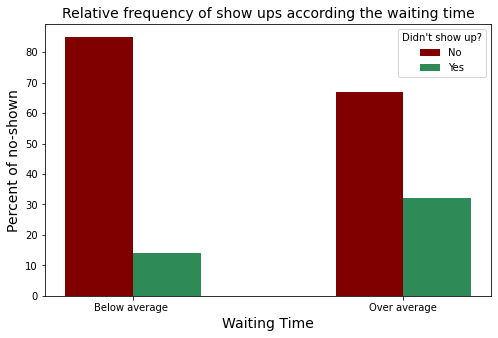

In [142]:
plt.figure(figsize=(8,5))
barWidth = 0.25

plt.bar(x = barWidth, height=time_df.below_waiting_time[0], label='No', width=barWidth, color='maroon')
plt.bar(x = barWidth*2, height=time_df.below_waiting_time[1], label='Yes', width=barWidth, color='seagreen')

plt.bar(x = barWidth*5, height=time_df.over_waiting_time[0], label='No', width=barWidth, color='maroon')
plt.bar(x = barWidth*6, height=time_df.over_waiting_time[1], label='Yes', width=barWidth, color='seagreen')

#plt.bar(x = barWidth+barWidth, height=[time_df.below_waiting_time[1],time_df.over_waiting_time[1]], label='Yes', width=barWidth)
# sns.barplot(x=['low_waiting_time', 'high_waiting_time'], y=['over_waiting_time', 'below_waiting_time'], hue='no-show', data=time_df, saturation=0.55)
plt.title("Relative frequency of show ups according the waiting time", fontsize=14)
plt.xlabel("Waiting Time", fontsize=14)
plt.ylabel("Percent of no-shown", fontsize=14)

plt.xticks([barWidth*1.5,  barWidth*5.5], 
           ['Below average ', 'Over average']) 
plt.legend( title = "Didn't show up?",labels=('No', 'Yes'), fontsize='medium');

`Observations`

We can see an increment of no-shown appointments when the waiting time was above average, different from when the waiting time is below average

### Research Question 4: Does the number of appointment is related to the probability of a canceled appointment?

##### First, I will divide the dataset with the patients that only had one appointment scheduled and the ones with more than one in the following intervals:
* Clients with 1 appointment
* Clients with more than 1 and less than 5 appointments
* Clients with more than 5 and less than 10 appointments
* Clients with more than 10 appointments

In [143]:
df_3.columns

Index(['patientid', 'gender', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show', 'waiting_time', 'day_of_week', 'number_of_appointments'],
      dtype='object')

In [149]:
one_app_df = df_3.query('number_of_appointments == 1')
more_app_df = df_3.query('number_of_appointments > 1 & number_of_appointments < 5')
many_more_app_df = df_3.query('number_of_appointments >= 5 & number_of_appointments < 10')
lot_more_app_df = df_3.query('number_of_appointments >= 10')

##### Grouping users with one appointment

In [156]:
one_app_df_2 = pd.DataFrame(one_app_df.groupby('no-show').count()['patientid'])
one_app_df_2.rename(columns={'patientid': 'one_appointment'}, inplace=True)
total = one_app_df_2.one_appointment.sum()
one_app_df_2, total

(         one_appointment
 no-show                 
 No                 50019
 Yes                12171,
 62190)

##### Relative frequency of cancelation of appointmenst with one appointment

In [157]:
one_app_df_2["one_appointment"][0] = round(one_app_df_2["one_appointment"][0]/total*100,2)
one_app_df_2["one_appointment"][1] = round(one_app_df_2["one_appointment"][1]/total*100,2)
one_app_df_2

,one_appointment
no-show,
No,80
Yes,19


##### Grouping clients with more than 1 and less than 5 appointments

In [164]:
more_app_df_2 = pd.DataFrame(more_app_df.groupby('no-show').count()['patientid'])
more_app_df_2.rename(columns={'patientid': 'between_1_and_5'}, inplace=True)
total = more_app_df_2.between_1_and_5.sum()
more_app_df_2, total

(         between_1_and_5
 no-show                 
 No                 31328
 Yes                 8439,
 39767)

##### Relative frequency of users with more than 1 and less than 5 appointments 

In [165]:
more_app_df_2["between_1_and_5"][0] = round(more_app_df_2["between_1_and_5"][0]/total*100,2)
more_app_df_2["between_1_and_5"][1] = round(more_app_df_2["between_1_and_5"][1]/total*100,2)
more_app_df_2

,between_1_and_5
no-show,
No,78
Yes,21


##### Grouping clients with more than 5 and less than 10 appointments

In [167]:
many_more_app_df_2 = pd.DataFrame(many_more_app_df.groupby('no-show').count()['patientid'])
many_more_app_df_2.rename(columns={'patientid': 'between_5_and_10'}, inplace=True)
total = many_more_app_df_2.between_5_and_10.sum()
many_more_app_df_2, total

(         between_5_and_10
 no-show                  
 No                   4752
 Yes                  1373,
 6125)

##### Relative frequency between the cancelation of appointment and the user have between 5 and 10 appointments

In [168]:
many_more_app_df_2["between_5_and_10"][0] = round(many_more_app_df_2["between_5_and_10"][0]/total*100,2)
many_more_app_df_2["between_5_and_10"][1] = round(many_more_app_df_2["between_5_and_10"][1]/total*100,2)
many_more_app_df_2

,between_5_and_10
no-show,
No,77
Yes,22


##### Grouping clients with more than 10 appointments

In [171]:
lot_more_app_df_2 = pd.DataFrame(lot_more_app_df.groupby('no-show').count()['patientid'])
lot_more_app_df_2.rename(columns={'patientid': 'more_than_10'}, inplace=True)
total = lot_more_app_df_2.more_than_10.sum()
lot_more_app_df_2

,more_than_10
no-show,
No,1682
Yes,230


##### Relative frequency between the clients with more than 5 and less than 10 appointments

In [172]:
lot_more_app_df_2["more_than_10"][0] = round(lot_more_app_df_2["more_than_10"][0]/total*100,2)
lot_more_app_df_2["more_than_10"][1] = round(lot_more_app_df_2["more_than_10"][1]/total*100,2)
lot_more_app_df_2

,more_than_10
no-show,
No,87
Yes,12


##### Merging the relative frequency dataframes

In [173]:
number_app_df = pd.concat([one_app_df_2, more_app_df_2, many_more_app_df_2, lot_more_app_df_2], axis=1)
number_app_df

,one_appointment,between_1_and_5,between_5_and_10,more_than_10
no-show,,,,
No,80,78,77,87
Yes,19,21,22,12


#### Plotting the relative frequency for number of appointments vs no-show

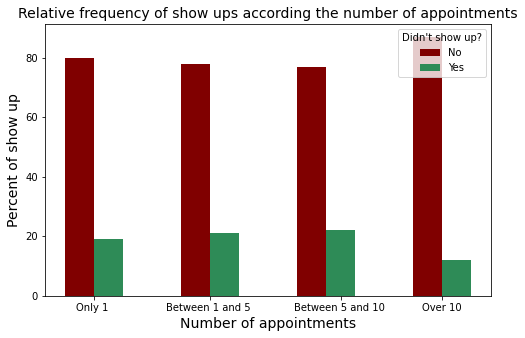

In [194]:
plt.figure(figsize=(8,5))
barWidth = 0.25

columns = ['one_appointment', 'between_1_and_5', 'between_5_and_10', 'more_than_10']
index = [1,5,9,13]
for i,col in zip(index,columns):
    
    plt.bar(x = barWidth*i, height=number_app_df[col][0], label='No', width=barWidth, color='maroon')
    plt.bar(x = barWidth*(i+1), height=number_app_df[col][1], label='Yes', width=barWidth, color='seagreen')
    
plt.xlabel("Number of appointments", fontsize=14)
plt.ylabel("Percent of show up", fontsize=14)

plt.xticks([barWidth*1.5,  barWidth*5.5, barWidth*10, barWidth*13.5], 
           ['Only 1 ', 'Between 1 and 5 ', 'Between 5 and 10 ', 'Over 10']) 
plt.legend( title = "Didn't show up?",labels=('No', 'Yes'), fontsize='medium');

`Observations` The result are pretty similar for all the ranges taking into account for the number of appointments. Not clear conclusion can be drawn using this approach.

### Research Question 5: Does the neighborhood influence?

* In this approach, I will combine the neighboourhood of the client with the number of appointment to draw conclusions.

##### Using the previously created dataset with the clients with only one appointment

In [198]:
one_app_df.neighbourhood.describe()

count              62190
unique                81
top       JARDIM CAMBURI
freq                4192
Name: neighbourhood, dtype: object

#### Filtering the most common neighbourhoods
We are going to filter out those neighbourhood with a representation of less than 25% of the total. Because the sampling is too low for them, they may affect the final result and conclusions.

In [217]:
df_neigh = pd.DataFrame(one_app_df["neighbourhood"].value_counts())
df_neigh.head(), df_neigh.max()


(                 neighbourhood
 JARDIM CAMBURI            4192
 MARIA ORTIZ               3336
 JARDIM DA PENHA           2401
 RESISTÊNCIA               2369
 ITARARÉ                   2132,
 neighbourhood    4192
 dtype: int64)

##### Filtering the neighbourhood with representation of less than 25% of the total

In [218]:
df_neigh.describe()


,neighbourhood
count,81.000000
mean,767.777778
std,767.587845
min,1.000000
25%,216.000000
50%,502.000000
75%,1100.000000
max,4192.000000


In [219]:

df_neigh = df_neigh.query('neighbourhood > 216')
len(df_neigh)

60

##### Obtaining the name of filtered neighbourhood


In [221]:
index = df_neigh.index

#### Dividing the dataset with the most common neighborhood

In [224]:
one_app_df_2 = pd.DataFrame(one_app_df.query("neighbourhood in @index"))
one_app_df_2.tail()

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,waiting_time,day_of_week,number_of_appointments
110511,8.235996e+11,F,14,MARIA ORTIZ,0,0,0,0,0,0,No,0,Wednesday,1
110512,9.876246e+13,F,41,MARIA ORTIZ,0,0,0,0,0,0,No,0,Wednesday,1
110518,7.263315e+13,F,50,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday,1
110520,9.969977e+14,F,42,MARIA ORTIZ,0,0,0,0,0,1,No,35,Tuesday,1
110524,1.557663e+13,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,Tuesday,1


In [225]:
one_app_df_2["no-show"].value_counts()

No     48285
Yes    11731
Name: no-show, dtype: int64

##### Filtering the dataset with the non-show up appointments

In [227]:
one_app_df_3 = one_app_df_2[one_app_df_2['no-show'] == 'Yes']
one_app_df_3.head()

,patientid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,waiting_time,day_of_week,number_of_appointments
6,7.336882e+14,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,Friday,1
7,3.449833e+12,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,Friday,1
11,7.542951e+12,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3,Friday,1
17,1.479497e+13,F,40,CONQUISTA,1,0,0,0,0,0,Yes,1,Friday,1
20,6.222575e+14,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2,Friday,1


#### Grouping the data by the amount of non-show up appointment by neighborhood

In [229]:
df_grouped = pd.DataFrame(one_app_df_3.groupby("neighbourhood").count()["patientid"])
df_sorted_neigh = df_grouped.sort_values(by="patientid", ascending=False)
df_sorted_neigh.head()

,patientid
neighbourhood,
JARDIM CAMBURI,771
MARIA ORTIZ,689
ITARARÉ,519
RESISTÊNCIA,468
JARDIM DA PENHA,396


#### Adding new columns to visualize the relationship of nonshowed appointments by neighbourhood vs versus the total of non-show ups appointments.

In [234]:

df_sorted_neigh.rename(columns={"patientid": "non_showed_appointments"}, inplace=True)


In [283]:
len(df_sorted_neigh)

60

#### Total of appointments by city, for the top 15 cities with more percent of non-show appointments

In [235]:
df_app = pd.DataFrame(one_app_df_2.groupby("neighbourhood").count()["patientid"])
# df_text = df_text.query("Neighbourhood in @y_1")
df_app.rename(columns= {"patientid":"number_of_appointments"}, inplace=True)
len(df_app)

60

#### Merging the tables

In [236]:
df_final = pd.concat([df_sorted_neigh,df_app], axis=1, join='inner')
df_final.head()

,non_showed_appointments,number_of_appointments
neighbourhood,,
JARDIM CAMBURI,771,4192
MARIA ORTIZ,689,3336
ITARARÉ,519,2132
RESISTÊNCIA,468,2369
JARDIM DA PENHA,396,2401


In [233]:
len(df_final)

60

In [245]:
df_final["percent_of_nonshown_appointments"] = round(df_final['non_showed_appointments']/df_final['number_of_appointments'],2)*100
df_final.head()

,non_showed_appointments,number_of_appointments,percent_of_nonshown_appointments
neighbourhood,,,
SANTA CECÍLIA,69,243,28.0
SANTOS DUMONT,197,709,28.0
DO MOSCOSO,61,228,27.0
SANTA CLARA,73,275,27.0
JESUS DE NAZARETH,355,1436,25.0


### Visualization of results

##### Sorting values by the last column

In [242]:
df_final.sort_values(by="percent_of_nonshown_appointments", ascending=False, inplace=True)
df_final.head()

,non_showed_appointments,number_of_appointments,percent_of_nonshown_appointments
neighbourhood,,,
SANTA CECÍLIA,69,243,28.0
SANTOS DUMONT,197,709,28.0
DO MOSCOSO,61,228,27.0
SANTA CLARA,73,275,27.0
JESUS DE NAZARETH,355,1436,25.0


#### Plot


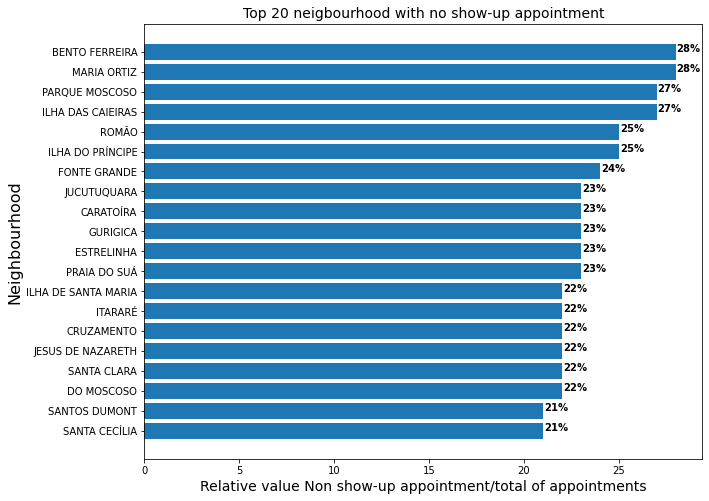

In [246]:
width=df_final["percent_of_nonshown_appointments"][:20]
width = width[::-1]
y = y_1 = df_final.head(20).index
y_1 = y_1[::-1]

fig, ax = plt.subplots(figsize=(10,8))

ax.barh(y=y, width=width)
plt.title('Top 20 neigbourhood with no show-up appointment', fontsize=14)
plt.xlabel('Relative value Non show-up appointment/total of appointments', fontsize=14)
plt.ylabel('Neighbourhood', fontsize=16)
for i, v in enumerate(width):
    ax.text(v + 0.05, i , str(int(v))+'%', color='black', fontweight='bold')

### Observations

The final visualization represent the percent of probabilities of an appointment coming from this neighbourhoods to be canceled. For example:

* In their first appointment, customers coming from Bento Ferreira have a 28% of probabilities of no showing.

## Conclusions

### Initial questions:
* What factors influence more in the decision of the patient to show up or not? 
* Is there any way of predicting if the appointment will be canceled?

Initial questions were answered. A clear relation between the variables and the outcome was not drawn; but by building new data, deeper exploration was possible. The new variables that helped to profundize deeper were:
* Waiting time: Reflects the time (in days) between the day the client set the appointment and the day of the appointment. 
* Weekday: Reflect the day of the week of the appointment.
* Number of Appointments: As many customers (patientId) scheduled more than 1 appointment (some more than 20), this variable reflect the number of appointments the client had made previously plus the current one.

##### Some of the conclusions I arrived are the following:

* The features of diabetes, hipertension, alcoholism, sms received, handcap and scholarship did not show, independently, any visible relation with the decision of the client of whether showing or not for their appointments.
* The weekday does not seem to affect the decision of the client to show up. Saturday does reflects a small increment in their rate of appointment getting canceled. But it is also needed to add that the sample for this day is considerably smaller than the others.
* Waiting time shows the highest relationship with canceled appointment, among all of the other variables. The result showed that over 30% of the appointments with waiting time over the average were cancelled/didn't show up. Compared to a 14% of the client with waiting time below the average.
* Number of appointment neither showed an important relationship with the cancelation. At most, the clients with more than 10 appointments showed lower rate of appointments being canceled. This can be biased by the fact that the sample was smaller than the others.
* Lastly, when looking at the clients per neighborhood. For those with 1 appointments, the neighbourhoods of Bento Ferreira and Maria Ortiz showed a 28% of their appointments being canceled. This visualization shows the probability of a client from these neighbourhood to not show up in their first appointment.

#### Summary of Result:

The waiting time was the feature which more correlation with the cancelation of an appointment.

### Hindrances:

* Uncertain values of handcap. Handcap is described to mean True or False according whether the client presented a handcap or not. However, in the beginning, values of 2, 3 and 4 were detected. In some of the discussion in the origen of the dataset (Kaggle) some statements referred as the number of handicaps of the client, but there were not clear enough. As a precaution, to avoid any possible bias to the analysis, these values were removed as they represented a small sample of the data.
* Meaning of the scheduledday and appointmentday columns were not clear. Even in the discussion board with the owner of the dataset, these features were not clear. Assumptions needed to be made related to them. For some clients, the appointment day was before the day they scheduled the appointment, which seemed to be incorrect. 

### Final Thoughts:

Even though dataset had more than 100k rows, the timestamp of the appointments is 40 days, which could be very small for a more serious decision. Not too many conclusions could be reached as the cancelation of the appointments were pretty random as analyzed in this notebook. However, further analysis can be made by combining different features such as weekday of appointment and neighbourhood and features such as sms received or alcoholism. Also, adding factors such as the Age and gender, which weren't covered in this analysis, could help for better conclusion

### References

* https://www.kaggle.com/joniarroba/noshowappointments/discussion
* https://www.geeksforgeeks.org/
* Pandas and matplotlib documentations.
* StackOverflow: https://stackoverflow.com/
